# 기상청 날씨 데이터 가져와서 그래프 그리기 

- 도시별 현재날씨 > 지상관측자료 > 관측자료 > 날씨 > 기상청
- http://www.kma.go.kr/weather/observation/currentweather.jsp


In [3]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈
 
# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가
 
data    # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨

with open('weather.csv', 'w') as file:    # weather.csv 파일을 쓰기 모드로 열기
    file.write('point,temperature,humidity\n')                  # 컬럼 이름 추가
    for i in data:                                              # data를 반복하면서
        file.write('{0},{1},{2}\n'.format(i[0], i[1], i[2]))    # 지점,온도,습도를 줄 단위로 저장



In [4]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
 
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정, 인코딩은 euc-kr로 설정 -> UTF-8로 바꿈
df = pd.read_csv('weather.csv', index_col='point', encoding='UTF-8')
df    # df 표시

,temperature,humidity
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


In [5]:

# 특별시, 광역시만 모아서 DataFrame 객체로 만듦
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
city_df    # city_df 표시


,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


# 그래프 mpl 패키지 폰트 사용을 위해

In [6]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 전체개수
print(len(font_list)) 

# 처음 10개만 출력
font_list[:10] 


1979


['/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
 '/Users/nuung/Library/Fonts/NotoSerifKhmer-Medium.ttf',
 '/Users/nuung/Library/Fonts/NotoSerifGeorgian-CondensedExtraBold.ttf',
 '/System/Library/Fonts/Supplemental/Tahoma Bold.ttf',
 '/Users/nuung/Library/Fonts/NotoSansArabicUI-CondensedExtraLight.ttf',
 '/Users/nuung/Library/Fonts/NotoSansLaoUI-ExtraCondensedBlack.ttf',
 '/Users/nuung/Library/Fonts/NotoSansTamil-SemiCondensedExtraBold.ttf',
 '/Users/nuung/Library/Fonts/NotoSerifGeorgian-ExtraCondensedSemiBold.ttf',
 '/Users/nuung/Library/Fonts/NotoSansTamilUI-ExtraLight.ttf',
 '/Users/nuung/Library/Fonts/NotoSansMalayalam-Regular.ttf']

# 사용 가능한 ttf 폰트 목록
- 사용가능한 ttf(true type font)폰트 목록은 다음 리스트로 간단하게 얻을 수 있다
- 사용가능한 폰트 목록 중 나눔글꼴(이름에 'Nanum'이 포함된) 폰트 목록만 추출



In [7]:
import matplotlib
import matplotlib.font_manager

font_list = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(len(font_list))
font_list[:10]

2013


['STIXSizeOneSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmsy10',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXSizeFourSym']

In [8]:
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquare', '/Library/Fonts/NanumSquareBold.ttf'),
 ('NanumSquare', '/Users/nuung/Library/Fonts/NanumSquareBold.ttf'),
 ('NanumSquare', '/Users/nuung/Library/Fonts/NanumSquareExtraBold.ttf'),
 ('NanumSquare', '/Users/nuung/Library/Fonts/NanumSquareRegular.ttf'),
 ('NanumSquare', '/Users/nuung/Library/Fonts/NanumSquareLight.ttf'),
 ('NanumSquareOTF', '/Users/nuung/Library/Fonts/NanumSquareOTFExtraBold.otf'),
 ('NanumSquareOTF', '/Users/nuung/Library/Fonts/NanumSquareOTFBold.otf'),
 ('NanumSquareOTF', '/Users/nuung/Library/Fonts/NanumSquareOTFRegular.otf'),
 ('NanumSquareOTF', '/Users/nuung/Library/Fonts/NanumSquareOTFLight.otf')]

# 폰트를 지정하는 두가지 방법

## matplotlib에서 폰트를 지정하여 출력하는 하는 대표적인 방법은 크기 두 가지이다.


1. 텍스트 출력시 폰트 특성을 지정: FontProperties 속성으로 폰트 속성을 지정
2. 전역으로 지정: rcParams 을 사용하여 전역으로 설정값을 지정


## 텍스트 출력시 폰트 특성을 지정
- 텍스트를 출력하는 다음 함수들을 사용할 때, fontproperties 인자에 폰트를 지정할 수 있다.

- matplotlib.pyplot
    - title()
    - xlabel()
    - ylabel()
    - legend()
    - text()

- matplotlib.axes
    - set_title()
    
- 예를 들어, 다음과 같이 텍스트와 폰트를 지정하여 출력할 수 있다.
plt.text(0, 0, "Sample Text", fontproperties=fontprop)


> 이제 위로 돌아가서, 특별시 광역시 온도 그래프 그려보자


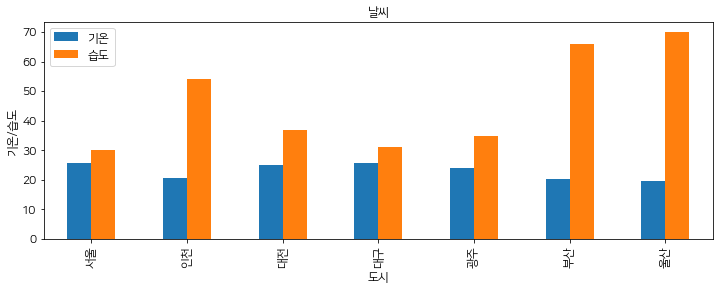

In [9]:

# Windows 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='/Library/Fonts/NanumSquareBold.ttf').get_name()
mpl.rc('font', family=font_name)
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12)     # y축 정보 표시
ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정


### show 메서드로 그래프를 표시하기
- 만약 %matplotlib inline를 지정하지 않았거나 
- IDLE, 파이썬 인터프리터에서 그래프를 표시하려면 matplotlib.pyplot의 show 함수 호출하면 됩니다.

plt.show()    # %matplotlib inline을 지정하지 않았거나 IDLE, 파이썬 인터프리터에서
              # 그래프를 표시하려면 matplotlib.pyplot의 show 함수 호출


### DataFrame 사용하기
- pandas 및 DataFrame은 기능이 매우 많아서 모두 설명하려면 책 한 권으로도 부족합니다. 
- 여기서는 DataFrame의 기본 기능만 설명하겠습니다. 다음과 같이 DataFrame 객체에 컬럼 이름만 지정하면 컬럼에 해당하는 값을 모두 가져올 수 있습니다. - 컬럼 이름은 [ ](대괄호)에 인덱스를 지정해도 되고, 속성으로 접근해도 됩니다.

DataFrame객체['컬럼이름']
DataFrame객체.컬럼이름

